# PROJETO FINAL DE MACHINE LEARNING II

### Objetivos: 
Com o ferramental em análise e em ciência de dados adquirido até o momento, a ideia
é, com este projeto, avaliar um dataset sob três óptica:

1. Uma análise exploratória de dados; 
2. Uma análise de segmentação;
3. Uma análise preditiva.

| **Característica** | **Descrição** |
|---------------------|---------------|
| `x`                | Comprimento (mm) |
| `y`                | Largura (mm)     |
| `z`                | Profundidade (mm) |
| `carat`            | Peso em quilates do diamante |
| `cut`              | Qualidade do corte do diamante. Qualidade em ordem crescente: Fair (Regular), Good (Bom), Very Good (Muito Bom), Premium, Ideal |
| `color`            | Cor do diamante, sendo D a melhor e J a pior |
| `clarity`          | Quão visíveis são as inclusões no diamante (em ordem da melhor para a pior): FL = impecável, IF, I1, I2, I3 (nível 3 de inclusões) |
| `depth`            | Profundidade %: A altura de um diamante, medida da base (culet) até a mesa, dividida pelo diâmetro médio da cintura |
| `table`            | Tabela %: A largura da mesa do diamante expressa como uma porcentagem do seu diâmetro médio |
| `price`            | O preço do diamante |


### Análises para Modelagem de Clusterização com KMeans

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
diamonds = pd.read_csv('./data/cleaned.csv')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,carat range
0,4.0,5.0,1.0,0.0,-1.198168,-0.174092,-1.099672,-0.904095,-1.587837,-1.536196,-1.571129
1,3.0,5.0,2.0,0.0,-1.240361,-1.360738,1.585529,-0.904095,-1.641325,-1.658774,-1.741175
2,1.0,5.0,4.0,0.0,-1.198168,-3.385019,3.375663,-0.903844,-1.498691,-1.457395,-1.741175
3,3.0,1.0,3.0,0.0,-1.071587,0.454133,0.242928,-0.902090,-1.364971,-1.317305,-1.287720
4,1.0,0.0,1.0,0.0,-1.029394,1.082358,0.242928,-0.901839,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...,...,...,...,...,...
53935,4.0,6.0,2.0,1.0,-0.164427,-0.662711,-0.204605,-0.294731,0.016798,0.022304,-0.054888
53936,1.0,6.0,2.0,1.0,-0.164427,0.942753,-1.099672,-0.294731,-0.036690,0.013548,0.100988
53937,2.0,6.0,2.0,1.0,-0.206621,0.733344,1.137995,-0.294731,-0.063434,-0.047741,0.030135
53938,3.0,2.0,1.0,1.0,0.130927,-0.523105,0.242928,-0.294731,0.373383,0.337506,0.285204


### Analisando as features "ordinais" - categricas com hierarquia/sequencia

| Feature | Categoria | Descrição |
|---|---|---|
| **cut** | Ideal | O corte mais desejável, maximizando o brilho do diamante. |
| | Premium | Alta qualidade de corte, mas um pouco abaixo do Ideal. |
| | Very Good | Boa qualidade de corte. |
| | Good | Qualidade de corte aceitável, mas com algumas imperfeições visíveis. |
| | Fair | A pior qualidade de corte, com muitas imperfeições visíveis. |
| **color** | D | Incolor, a cor mais desejável e rara. |
| | E | Quase incolor, muito próximo do D. |
| | F | Levemente amarelado, ainda considerado incolor. |
| | G | Ligeiramente amarelado, mas menos desejável que F. |
| | H | Amarelado, menos desejável que G. |
| | I | Distintamente amarelado. |
| | J | Amarelado, a cor menos desejável. |
| **clarity** | IF (Internally Flawless) | Sem inclusões visíveis sob 10x de ampliação. |
| | VVS1 e VVS2 (Very Very Slightly Included) | Inclusões muito, muito pequenas e difíceis de serem vistas por um observador experiente. |
| | VS1 e VS2 (Very Slightly Included) | Inclusões menores, difíceis de serem vistas por um observador experiente. |
| | SI1 e SI2 (Slightly Included) | Inclusões menores, visíveis sob 10x de ampliação. |
| | I1 (Included) | Inclusões óbvias, visíveis a olho nu. |
| **carat** | 0.0-0.5 | Diamantes de peso muito pequeno. |
| | 0.6-1.0 | Diamantes de peso pequeno. |
| | 1.1-1.5 | Diamantes de peso médio. |
| | 1.6-2.0 | Diamantes de peso médio a grande. |
| | 2.1-2.5 | Diamantes grandes. |
| | 2.6-3.0 | Diamantes muito grandes. |
| | 3.1-3.5 | Diamantes excepcionais, muito grandes. |
| | 3.6-4.0 | Diamantes extremamente grandes e raros. |
| | 4.1-4.5 | Diamantes excepcionalmente grandes e raríssimos. |
| | >4.6 | Diamantes gigantescos, extremamente raros. |



In [15]:
diamonds.cut.value_counts(), diamonds.color.value_counts(), diamonds.clarity.value_counts()

(cut
 3.0    11292
 5.0     9797
 4.0     9542
 2.0     8304
 6.0     6775
 1.0     5422
 0.0     2808
 Name: count, dtype: int64,
 color
 2.0    13065
 3.0    12258
 1.0     9194
 4.0     8171
 5.0     5066
 6.0     3655
 7.0     1790
 0.0      741
 Name: count, dtype: int64,
 clarity
 0.0    18932
 1.0    17506
 2.0    12060
 3.0     3553
 4.0     1763
 5.0       94
 6.0       23
 7.0        4
 8.0        4
 9.0        1
 Name: count, dtype: int64)

In [16]:
diamonds['carat range'].value_counts()

carat range
-1.188526     767
-1.202697     748
-1.174356     738
-1.216867     730
-1.160185     697
             ... 
-1.783686       1
-1.769516       1
-2.095437       1
-1.826198       1
 40.047576      1
Name: count, Length: 375, dtype: int64

### Acredito que o gráfico abaixo revela alguns dos outliers que estão principalmente entre os grupos, com os claridades específcas. 

<Axes: xlabel='cut,color'>

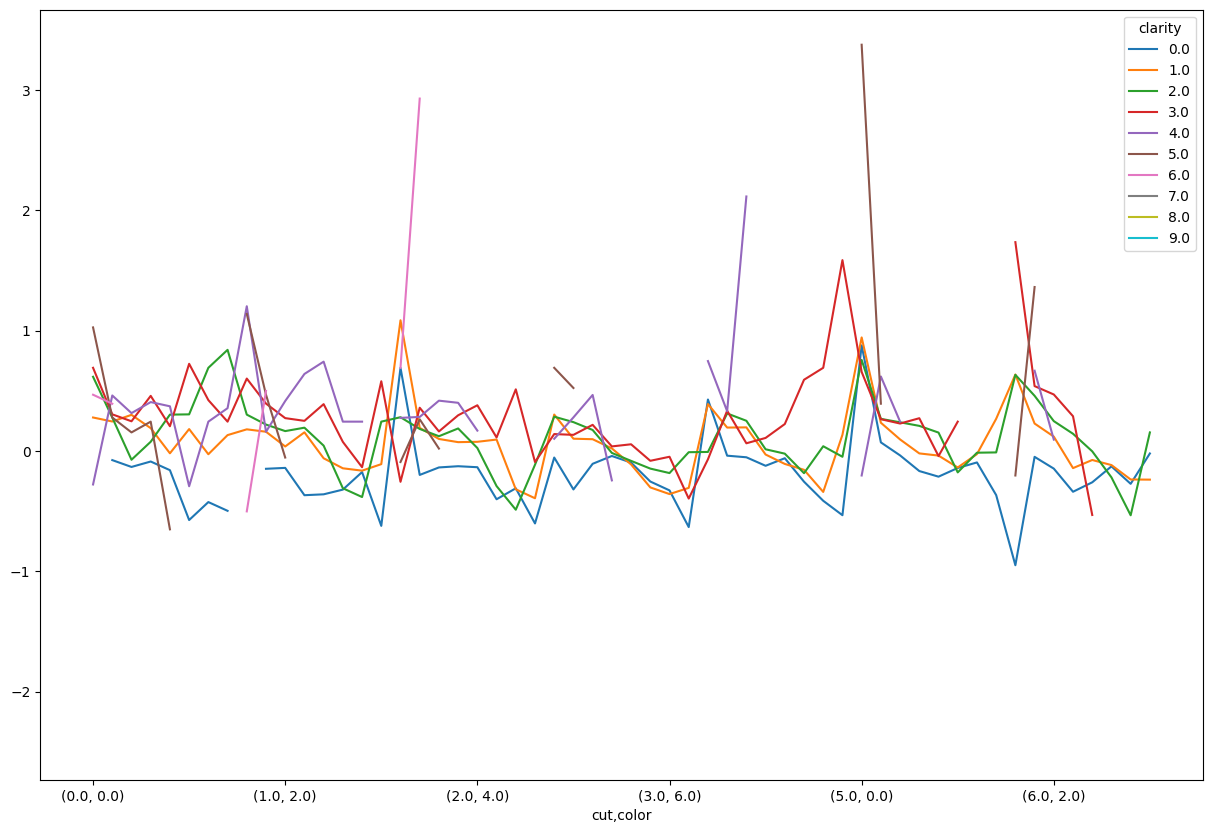

In [17]:
diamonds.groupby(['cut', 'color', 'clarity'])['price'].mean().unstack().plot(figsize=(15, 10))

C:\Users\João\AppData\Local\Temp\ipykernel_640\2086375752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cut', data=diamonds, palette='Set2')
C:\Users\João\AppData\Local\Temp\ipykernel_640\2086375752.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='color', data=diamonds, palette='Set2')
C:\Users\João\AppData\Local\Temp\ipykernel_640\2086375752.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='clarity', data=diamonds, palette='Set2')
C:\Users\João\AppData\Local\Temp\ipykernel_640\2086375752.py:24: UserWarning: Ignor

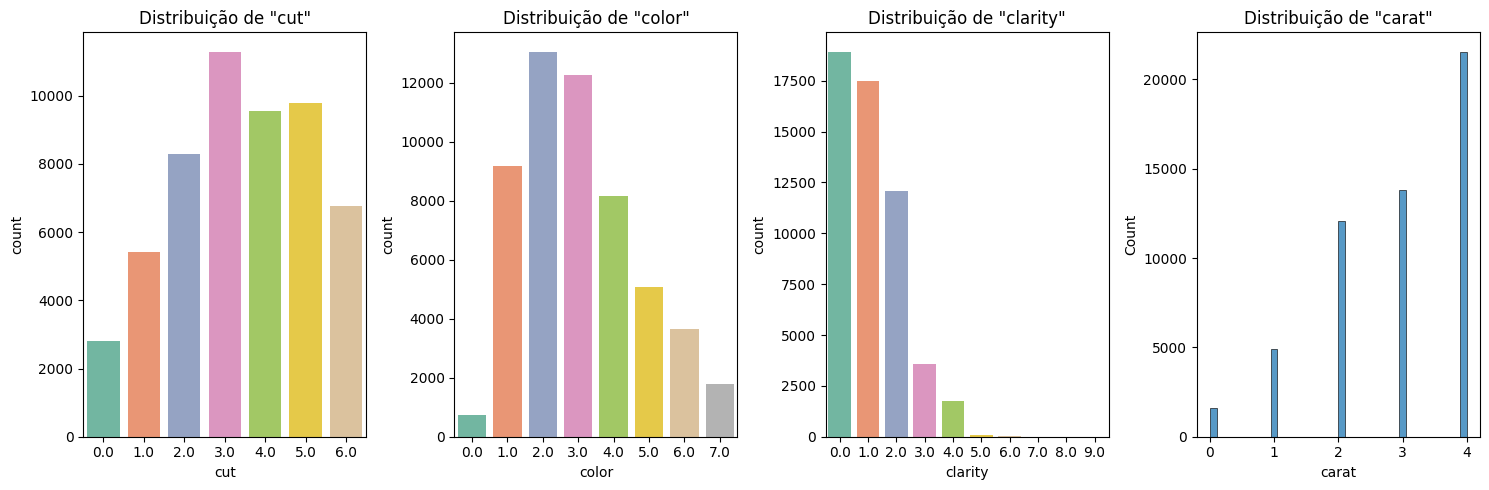

In [ ]:
# Configurar a figura
plt.figure(figsize=(15, 5))

# Gráfico 1: Histograma para a feature 'cut'
plt.subplot(1, 4, 1)
sns.countplot(x='cut', data=diamonds, palette='Set2')
plt.title('Distribuição de "cut"')

# Gráfico 2: Histograma para a feature 'color'
plt.subplot(1, 4, 2)
sns.countplot(x='color', data=diamonds, palette='Set2')
plt.title('Distribuição de "color"')

# Gráfico 3: Histograma para a feature 'clarity'
plt.subplot(1, 4, 3)
sns.countplot(x='clarity', data=diamonds, palette='Set2')
plt.title('Distribuição de "clarity"')

# Gráfico 4: Histograma para a feature 'carat range'
plt.subplot(1, 4, 4)
sns.histplot(x='carat', data=diamonds, kde=False, palette='Set2')  # Alterado para histplot
plt.title('Distribuição de "carat"')

# Exibir os gráficos
plt.tight_layout()
plt.show()


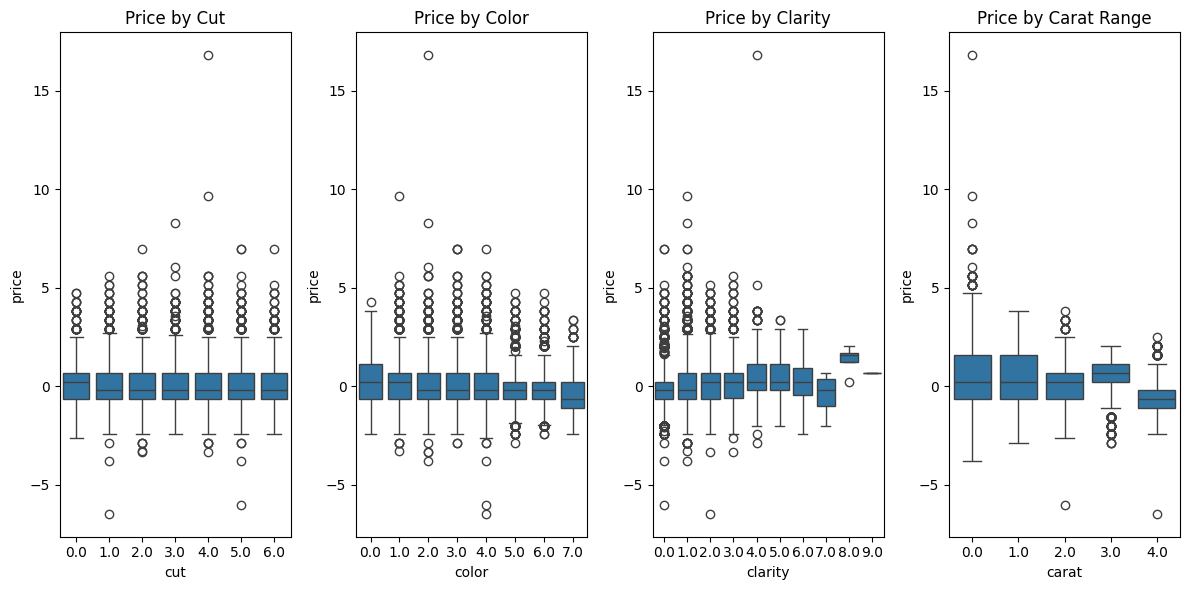

In [35]:
# Criando o boxplot para as variáveis "cut", "color" e "clarity" com a variável "price"
plt.figure(figsize=(12, 6))

# Boxplot para "cut"
plt.subplot(1, 4, 1)
sns.boxplot(x='cut', y='price', data=diamonds)
plt.title('Price by Cut')

# Boxplot para "color"
plt.subplot(1, 4, 2)
sns.boxplot(x='color', y='price', data=diamonds)
plt.title('Price by Color')

# Boxplot para "clarity"
plt.subplot(1, 4, 3)
sns.boxplot(x='clarity', y='price', data=diamonds)
plt.title('Price by Clarity')

# Boxplot para "clarity"
plt.subplot(1, 4, 4)
sns.boxplot(x='carat', y='price', data=diamonds)
plt.title('Price by Carat Range')

plt.tight_layout()
plt.show()

### Analisando os autliers

`IQR (Intervalo Interquartil):`

Calcule o primeiro quartil (Q1) e o terceiro quartil (Q3).

Determine o IQR (Q3 - Q1).

Qualquer valor abaixo de Q1 - 1.5IQR ou acima de Q3 + 1.5IQR é considerado um outlier.

`Z-score:`

Calcule a média e o desvio padrão da variável.

Calcule o z-score para cada observação: (valor - média) / desvio padrão.

Valores com z-score acima de 3 ou abaixo de -3 são frequentemente considerados outliers.

In [36]:
# Calculando IQR e Z-score para a coluna 'price'
Q1 = diamonds['price'].quantile(0.25)
Q3 = diamonds['price'].quantile(0.75)
IQR = Q3 - Q1

# Outliers usando IQR
outliers_iqr = (diamonds['price'] < (Q1 - 1.5*IQR)) | (diamonds['price'] > (Q3 + 1.5*IQR))

# Outliers usando Z-score
z_scores = np.abs((diamonds['price'] - diamonds['price'].mean()) / diamonds['price'].std())
outliers_zscore = z_scores > 3

# Contando o número de outliers
print("Número de outliers (IQR):", outliers_iqr.sum())
print("Número de outliers (Z-score):", outliers_zscore.sum())

Número de outliers (IQR): 605
Número de outliers (Z-score): 336


In [38]:
print("Percentual de outliers em relação ao dataset (IQR):",
      outliers_iqr.sum()/ diamonds.shape[0]*100)

Percentual de outliers em relação ao dataset (IQR): 1.121616611049314


### Splitting o dataset para clusterização - primeiras observações
### Preparando o algoritmo de Clusterização utilizando o preprocessamento já realizado

In [39]:
X = diamonds.drop('price', axis=1)
y = diamonds.price

In [75]:
X.head()

,cut,color,clarity,carat,depth,table,x,y,z
0,4.0,5.0,1.0,0.0,0.513889,0.230769,0.367784,0.067572,0.076415
1,3.0,5.0,2.0,0.0,0.466667,0.346154,0.362197,0.065195,0.072642
2,1.0,5.0,4.0,0.0,0.386111,0.423077,0.377095,0.069100,0.072642
3,3.0,1.0,3.0,0.0,0.538889,0.288462,0.391061,0.071817,0.082704
4,1.0,0.0,1.0,0.0,0.563889,0.288462,0.404097,0.073854,0.086478


In [40]:
y.head()

0   -1.099672
1    1.585529
2    3.375663
3    0.242928
4    0.242928
Name: price, dtype: float64

In [41]:
diamonds_base = X.copy()

In [42]:
from sklearn.cluster import KMeans

### Funções de cálculo de inécias e plotagem otimizadas (vista em aula)

In [43]:
def calculo_inercias(X, lista_k, plot=True):
    """
    Calcula as inércias para uma lista de valores de k em KMeans.
    Plota os agrupamentos se os dados forem bidimensionais.
    
    Parameters:
        X (DataFrame or array-like): Dados para clusterização.
        lista_k (list): Lista de valores de k para testar.
        plot (bool): Indica se os gráficos de agrupamento devem ser exibidos.

    Returns:
        list: Lista de inércias para cada valor de k.
    """
    # Lista para armazenar as inércias
    lista_inercias = []
    
    # Verificar se os dados possuem 2 dimensões (necessário para plotagem)
    is_2d = plot and X.shape[1] == 2
    df_X = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])

    for k in lista_k:
        # Configuração e ajuste do modelo KMeans
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)

        # Registrar a inércia
        inercia = kmeans.inertia_
        lista_inercias.append(inercia)

        # Exibir gráfico se os dados forem bidimensionais
        if is_2d:
            print(f'\nInércia para clusterização com k = {k}: {inercia}')
            df_result = df_X.copy()
            df_result['label'] = kmeans.labels_
            plot_clusters(df_result, k)
    
    return lista_inercias


def plot_clusters(df_result, k):
    """
    Plota os agrupamentos gerados pelo KMeans para dados 2D.
    
    Parameters:
        df_result (DataFrame): Dados com rótulos de cluster.
        k (int): Número de clusters.
    """
    sns.scatterplot(data=df_result, x="Feature_1", y="Feature_2", hue="label", palette="viridis")
    plt.title(f'Agrupamento para k={k}')
    plt.show()


### Relaçõe entre $k$ e o $WCSS (inercia)$

O objetivo é encontrar um $k$ a partir do qual o $WCSS$ **para de decrescer tão rapidamente!**


Inércia para clusterização com k = 2: 70719.69762483171


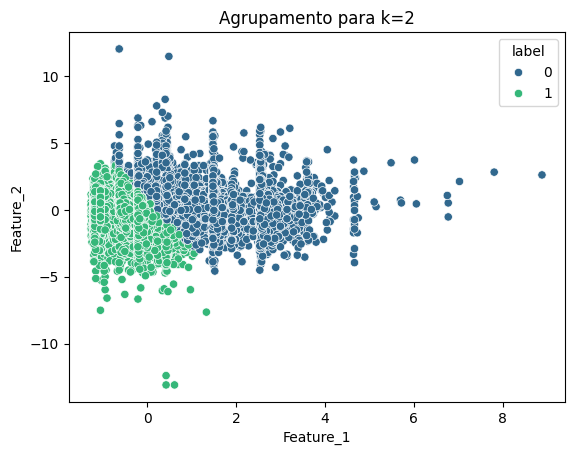


Inércia para clusterização com k = 3: 49821.80639033437


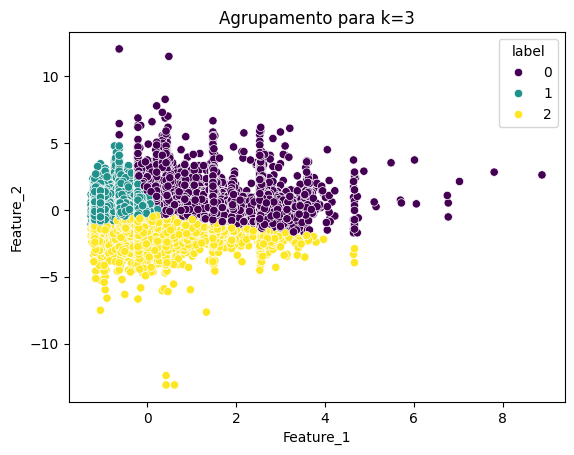


Inércia para clusterização com k = 4: 42226.33635288521


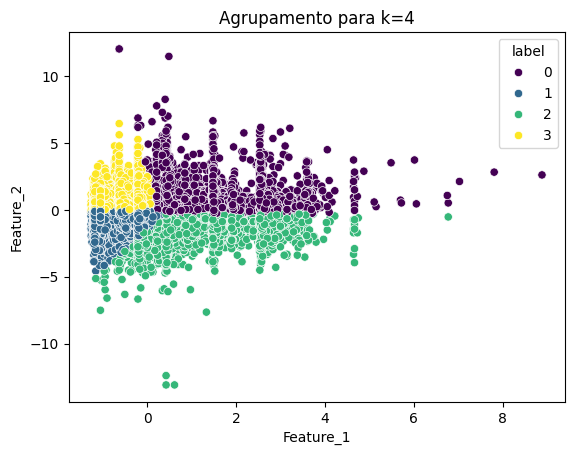


Inércia para clusterização com k = 5: 31935.241437036213


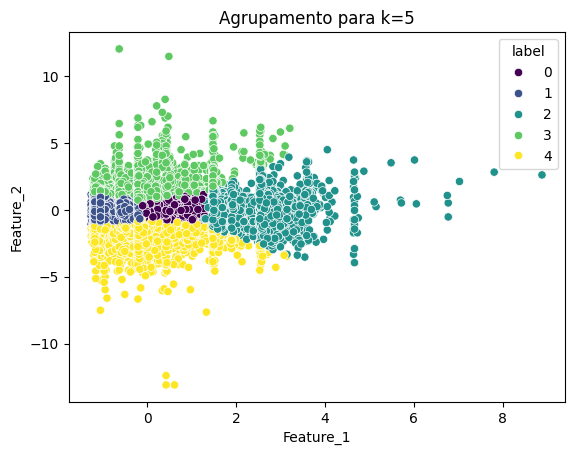


Inércia para clusterização com k = 6: 26834.288632614793


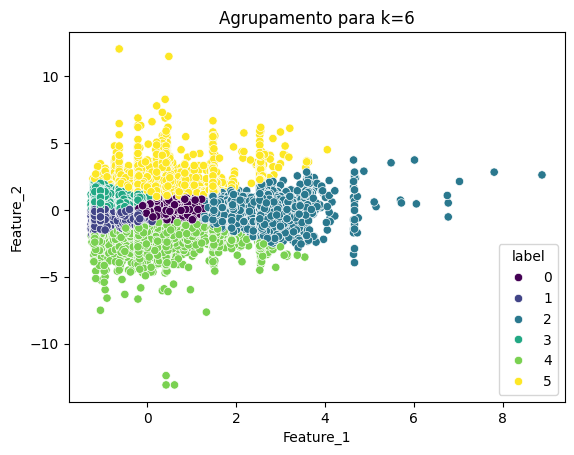


Inércia para clusterização com k = 7: 23634.280806099254


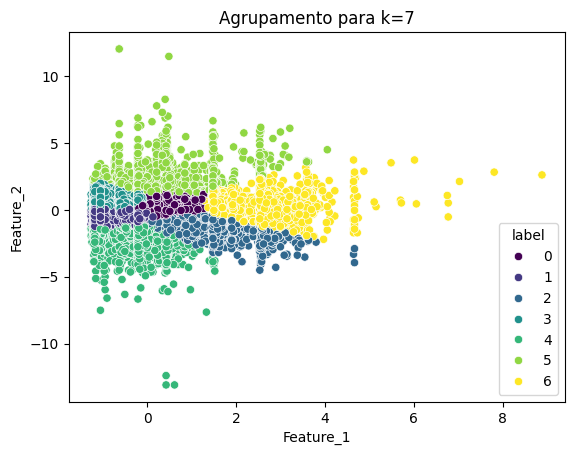


Inércia para clusterização com k = 8: 21667.691611638314


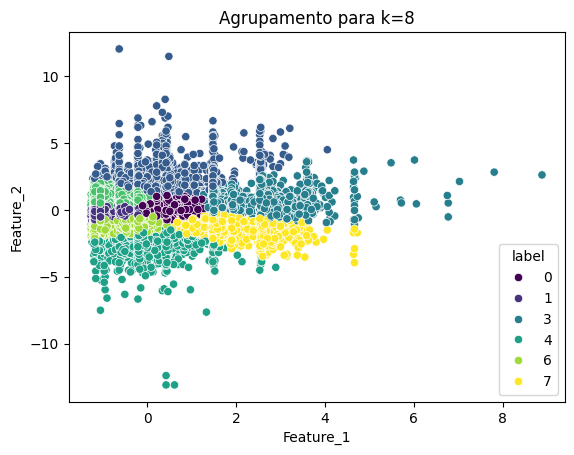

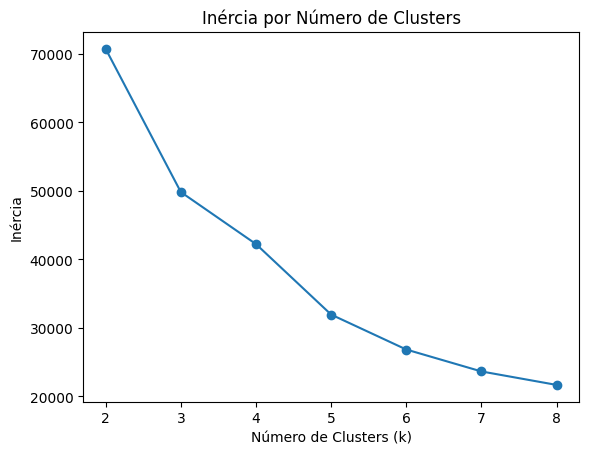

In [44]:
# Features para clusterização - para selecionar as desejadas ["cut", "color", "clarity", "carat", "depth", "table"]
features = ["depth", "table"]
diamonds_base_cluster = diamonds_base[features].values

# Lista de valores de k
lista_k = [2, 3, 4, 5, 6, 7, 8]

# Inércias e plotar os agrupamentos
inercias = calculo_inercias(diamonds_base_cluster, lista_k, plot=True)

# Visualizar as inércias
plt.plot(lista_k, inercias, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Inércia por Número de Clusters')
plt.show()

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### Avaliando com o Método da silhueta

In [47]:
def silhouette_analysis(X, range_n_clusters):
    """
    Realiza a análise de silhouette para diferentes valores de n_clusters em KMeans
    e plota os gráficos correspondentes.

    Parameters:
        X (array-like): Dados para clusterização.
        range_n_clusters (list): Lista de valores de n_clusters a serem testados.
    """
    for n_clusters in range_n_clusters:
        # Configurar a figura com 2 subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Configuração do gráfico de silhouette
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Inicializar o clusterer e calcular os rótulos
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(X)

        # Cálculo do silhouette médio
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"Para n_clusters = {n_clusters}, o silhouette médio é {silhouette_avg:.2f}")

        # Cálculo do silhouette para cada amostra
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Selecionar e ordenar os valores de silhouette do cluster i
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # Escolher uma cor para o cluster
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Rotular o gráfico
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # Ajustar para o próximo cluster

        ax1.set_title("Gráfico de silhouette para os clusters.")
        ax1.set_xlabel("Coeficiente de silhouette")
        ax1.set_ylabel("Rótulo do cluster")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Plotar os clusters
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Centroides
        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker=f'${i}$', alpha=1, s=50, edgecolor='k')

        ax2.set_title("Visualização dos dados clusterizados.")
        ax2.set_xlabel("Espaço da primeira feature")
        ax2.set_ylabel("Espaço da segunda feature")

        title = f"Análise de silhouette para KMeans com n_clusters = {n_clusters}\n"
        title += f"Silhouette médio = {silhouette_avg:.2f}"
        plt.suptitle(title, fontsize=14, fontweight='bold')

        plt.show()


Para n_clusters = 2, o silhouette médio é 0.38


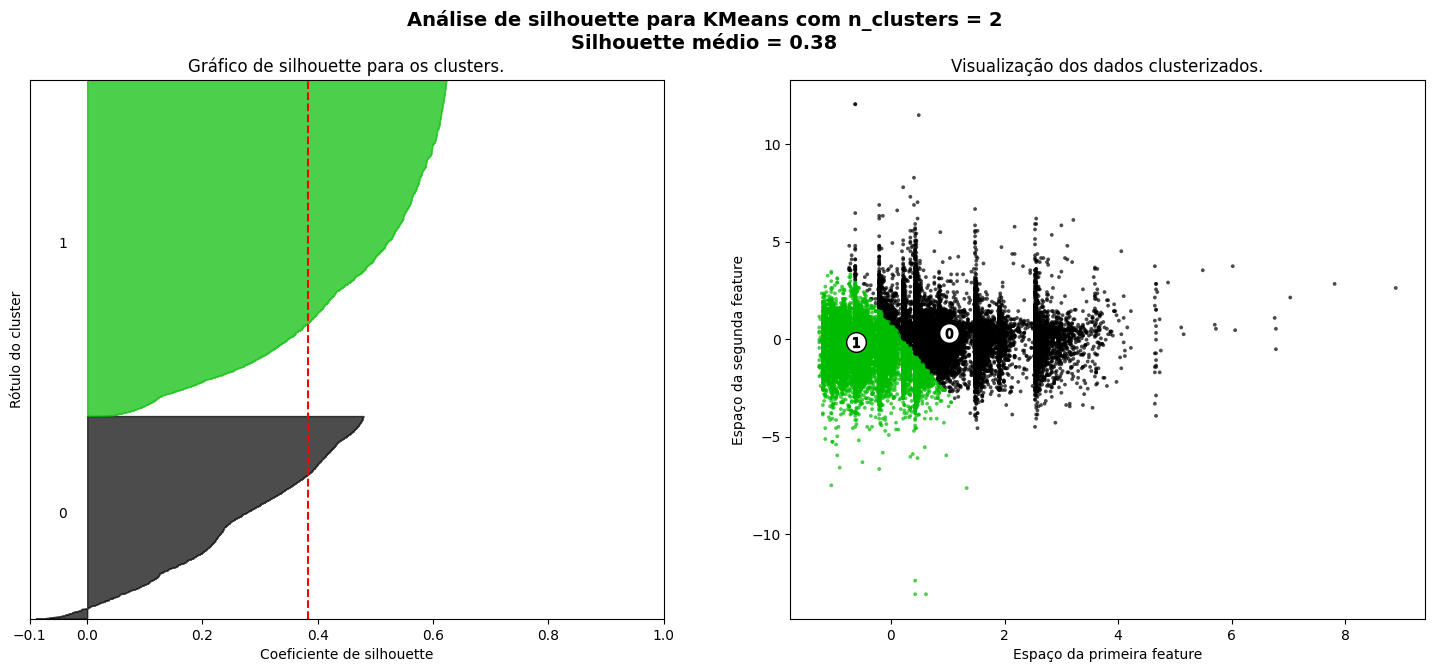

Para n_clusters = 3, o silhouette médio é 0.40


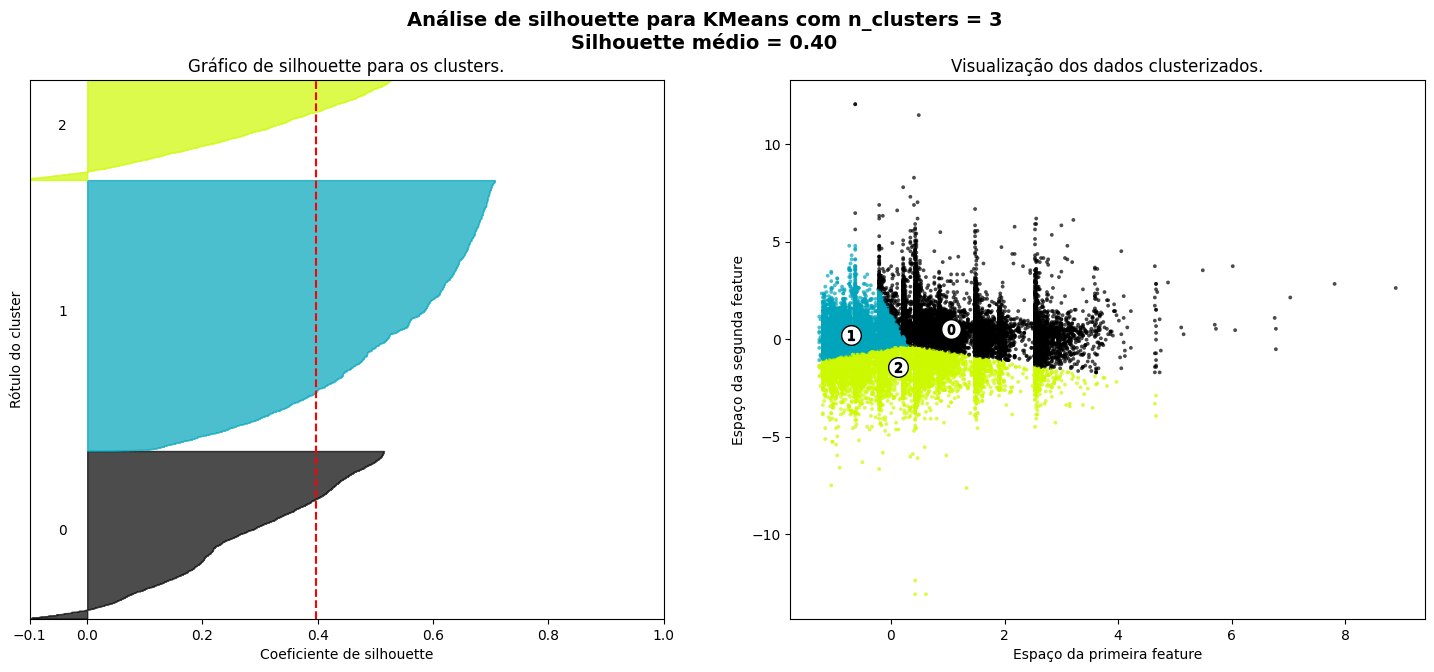

Para n_clusters = 4, o silhouette médio é 0.32


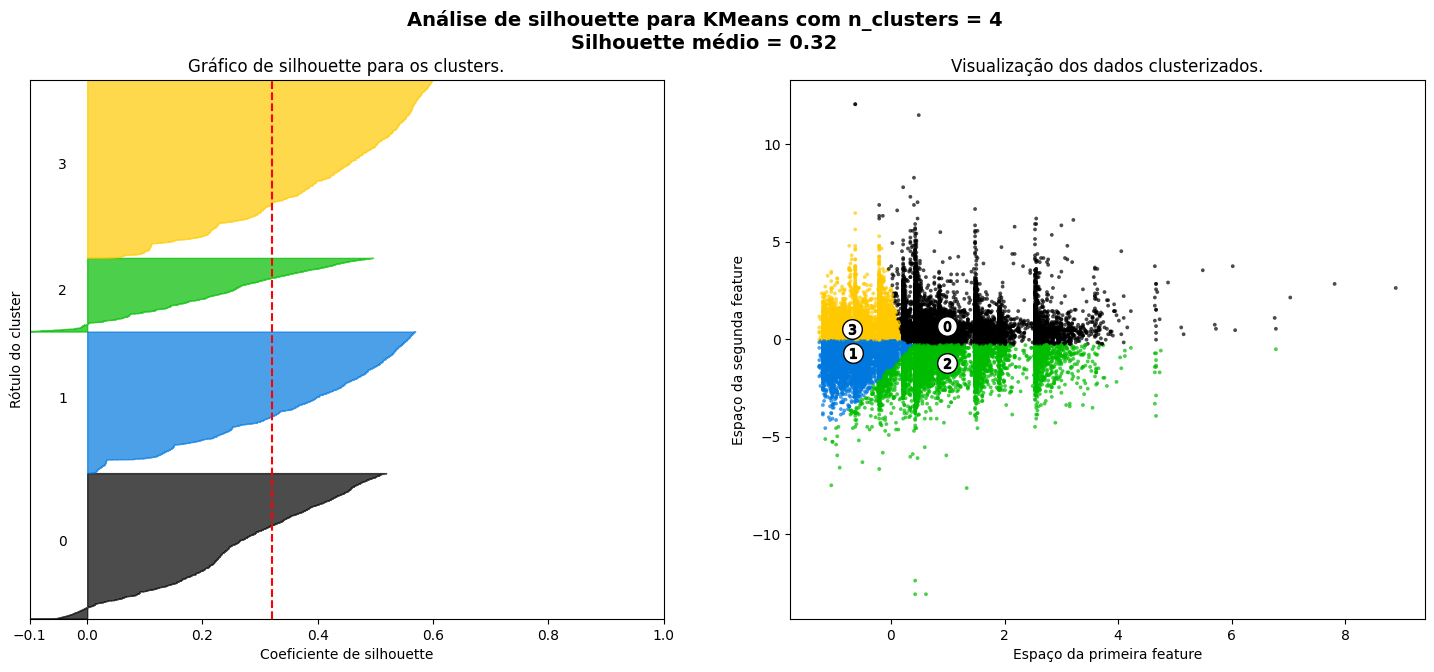

Para n_clusters = 5, o silhouette médio é 0.38


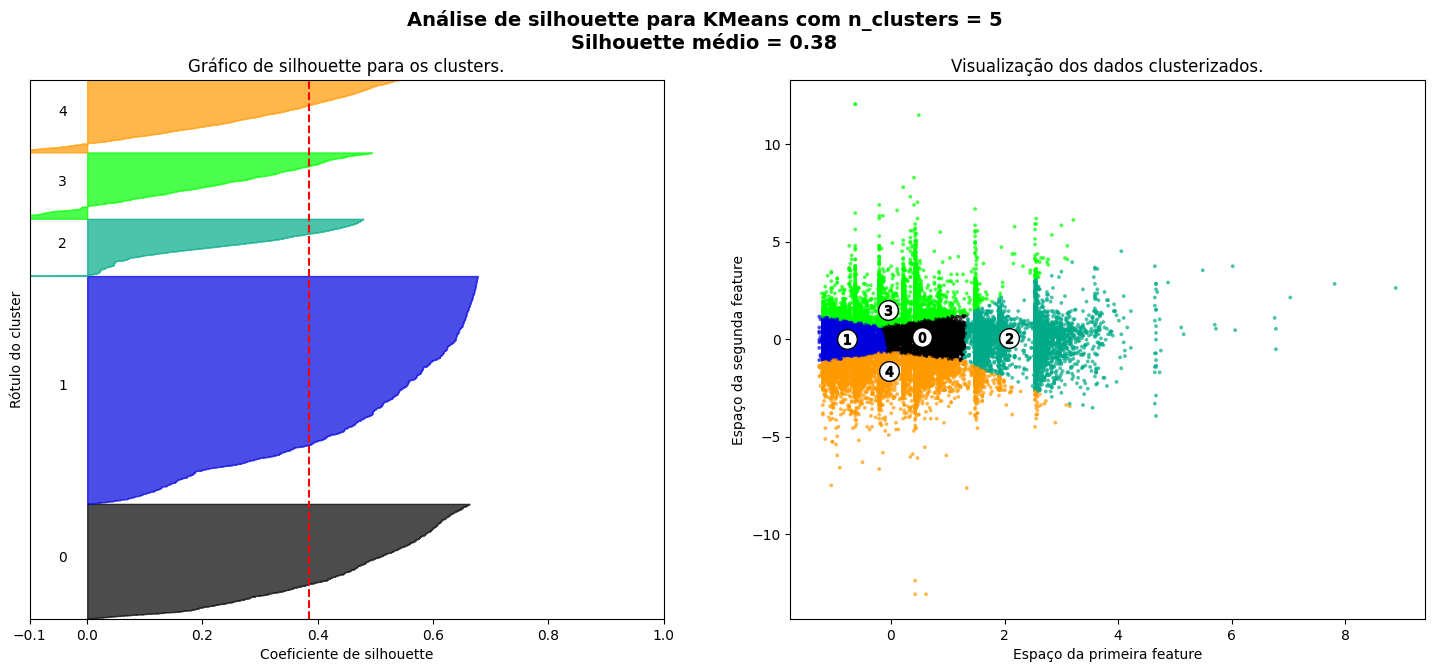

Para n_clusters = 6, o silhouette médio é 0.36


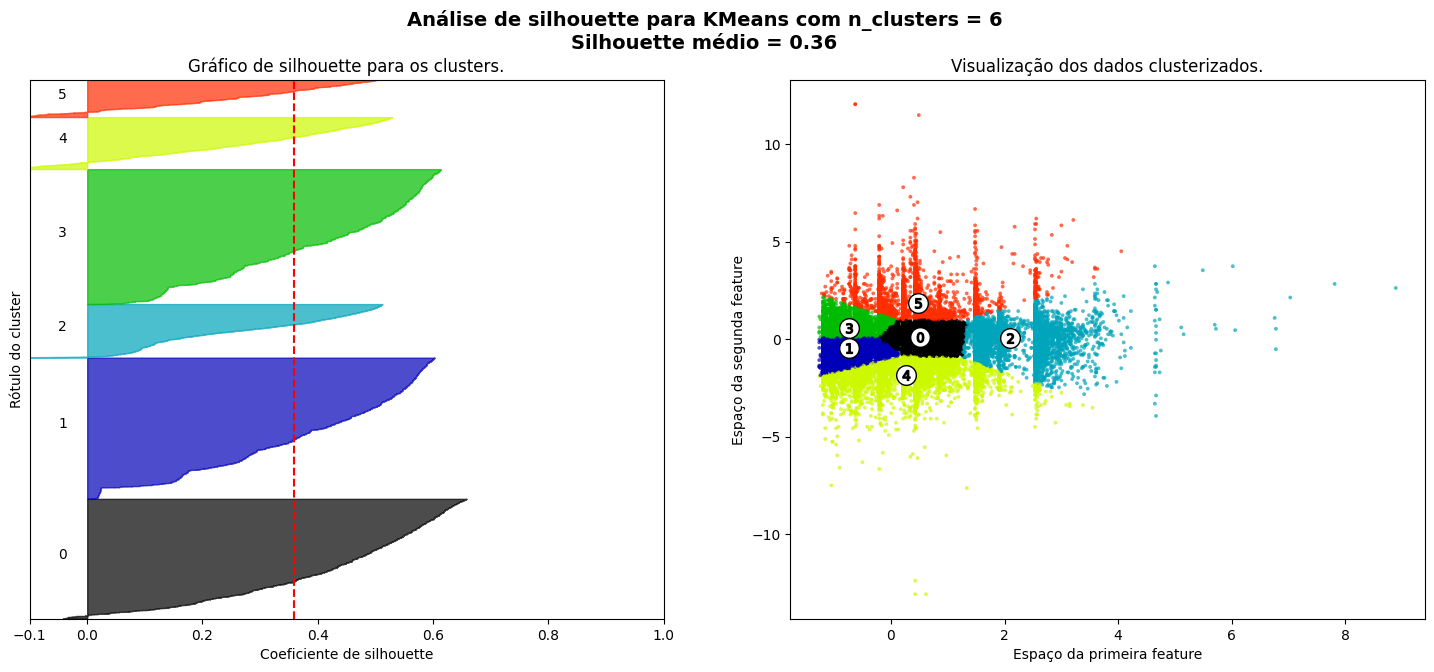

Para n_clusters = 7, o silhouette médio é 0.36


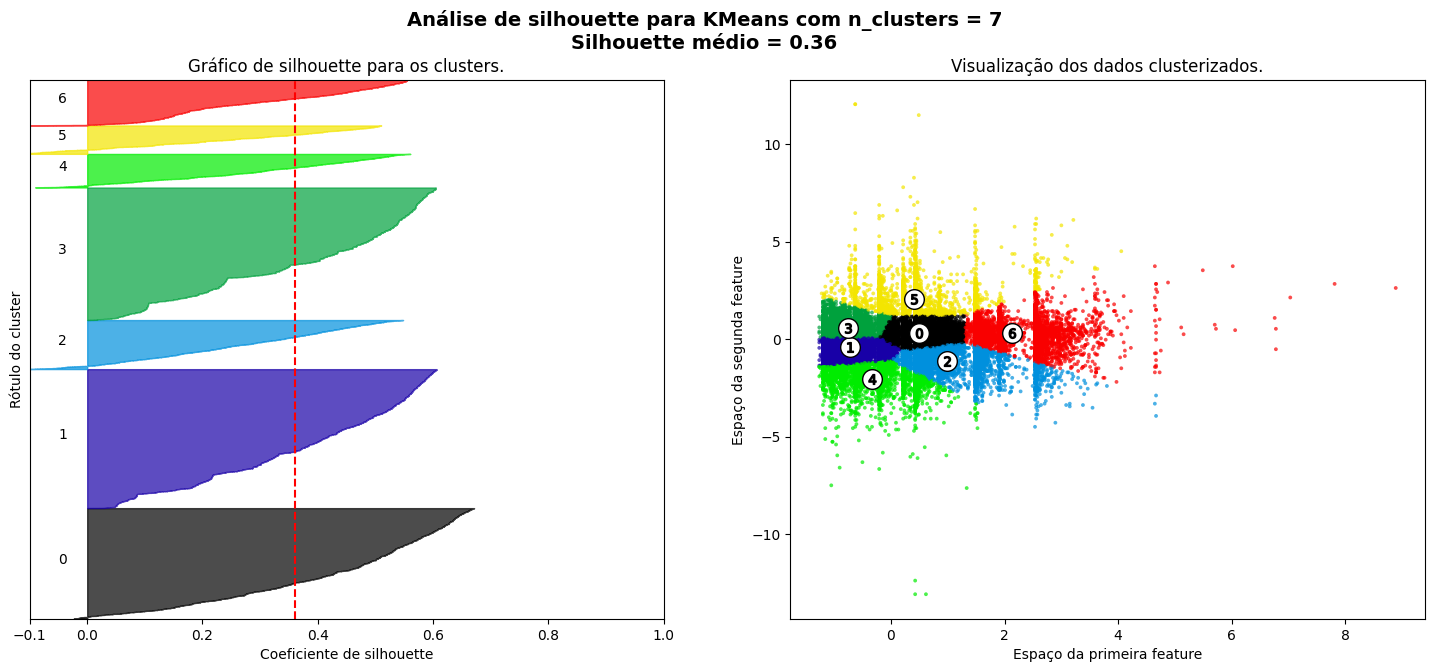

Para n_clusters = 8, o silhouette médio é 0.35


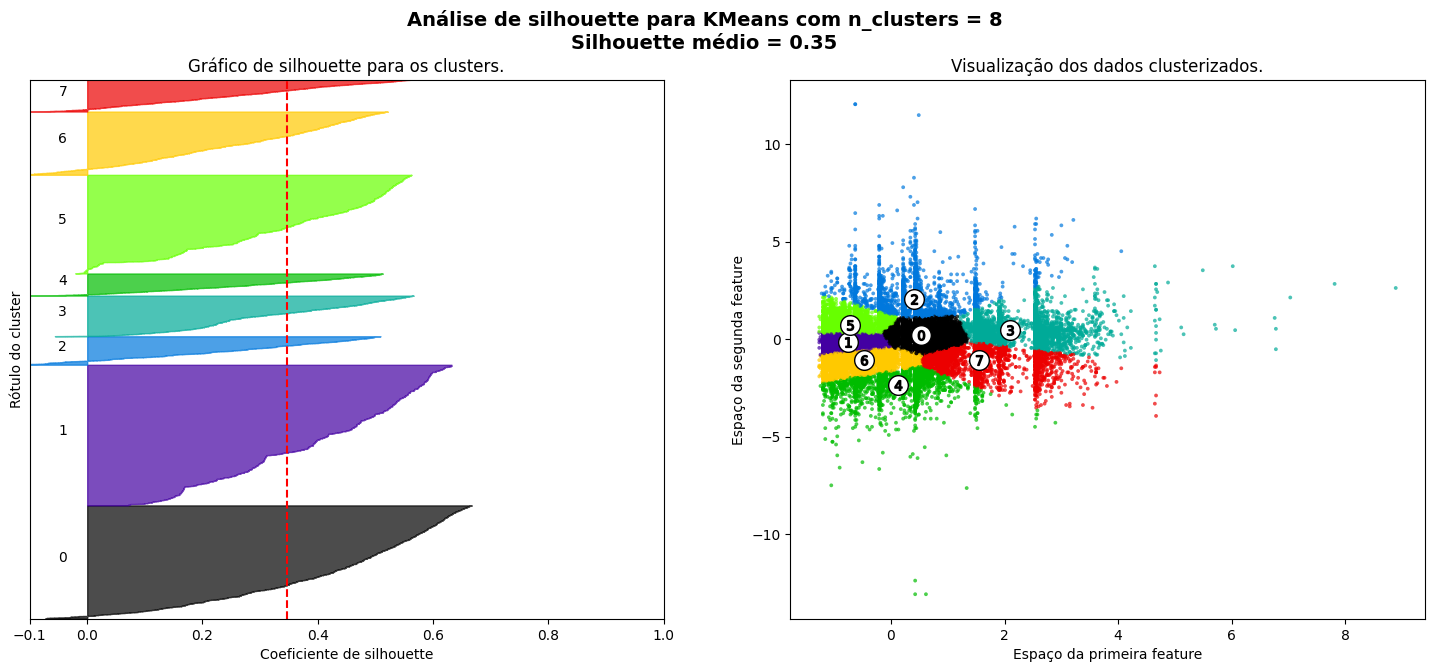

In [48]:
# Features para clusterização - para selecionar as desejadas ["cut", "color", "clarity", "carat", "depth", "table"]
features = ["depth", "table"]
diamonds_base_cluster = diamonds_base[features].values

# Lista de valores de k
lista_k = [2, 3, 4, 5, 6, 7, 8]

# Chamada da função
silhouette_analysis(diamonds_base_cluster, lista_k)